<h1>Image Classifier</h1>

<ul><h2>Objectif projet:</h2>
<li>Analyse Exploratoire du Dataset CIFAR-10</li>
<li>Preprocessing des données</li>
<li>Implémentation du modèle CNN</li>
</ul>


In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

<h2>Analyse Exploratoire des Données</h2>

<h3>Chargement des données</h3>

In [2]:
base_dir = r"image-classifier/cifar-10-batches-py"

In [3]:
# Création de la fonction pour charger nos données
def load_cifar10_batch_data(file):
    if not os.path.exists(file):
        raise FileNotFoundError(f"Le fichier {file} n'existe pas.")
        
    with open(file, "rb") as f:
        data_dict = pickle.load(f, encoding="bytes")
        images = data_dict[b"data"]
        labels = data_dict[b"labels"]
        
        images = images.reshape(len(images), 3, 32, 32).transpose(0, 2, 3, 1)
        return images, labels

# On charge les noms des classes
def load_meta_data_cifar10(file):
    if not os.path.exists(file):
        raise FileNotFoundError(f"Le fichier {file} n'existe pas.")
        
    with open(file, "rb") as f:
        meta_dict = pickle.load(f, encoding="bytes")
        class_names = [name.decode("utf-8") for name in meta_dict[b"label_names"]]
        return class_names

# Chargement d'un batch de données
file_path = os.path.join(base_dir, "data_batch_1")
images, labels = load_cifar10_batch_data(file_path)
print(f"Images shape: {images.shape}, labels: {len(labels)}")

# Les listes qui vont contenir les donnée trainset
train_images = []
train_labels = []

for i in range(1, 6):
    batch_path = os.path.join(base_dir, f"data_batch_{i}")
    images, labels = load_cifar10_batch_data(batch_path)  # Correction du nom de fonction
    train_images.append(images)
    train_labels.append(labels)

# On va concatnier les images et les labels
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")


test_file_path = os.path.join(base_dir, "test_batch")
x_test, y_test = load_cifar10_batch_data(test_file_path)

Images shape: (10000, 32, 32, 3), labels: 10000
Train images shape: (50000, 32, 32, 3), Train labels shape: (50000,)


<h3>Dimension de nos données</h3>

In [4]:
print("TRAIN")
print(f"Dimension des IMAGES: {train_images.shape}")
print(f"Dimension des LABELS: {len(train_labels)}")
print("\n")
print("TEST")
print(f"Dimension des IMAGES: {x_test.shape}")
print(f"Dimension des LABELS: {len(y_test)}")


TRAIN
Dimension des IMAGES: (50000, 32, 32, 3)
Dimension des LABELS: 50000


TEST
Dimension des IMAGES: (10000, 32, 32, 3)
Dimension des LABELS: 10000


<h3>Statistiques</h3>
<p>On regarde combien d'images il y a pour chaque classe dans nos jeu de donnée(train/test):</p>

In [5]:
class_names = load_meta_data_cifar10(r"image-classifier/cifar-10-batches-py/batches.meta")

def destribution_class_data(labels, class_names, images):
    class_counts = Counter(labels)
    for class_idx, count in class_counts.items():
        print(f"Classe {class_idx} ({class_names[class_idx].upper()}): {count} images")
        print(f"Valeurs min pixels : {images.min()}, valeurs max pixels: {images.max()}")
        print(f"Valeurs moyennes pixels : {images.mean()}")
        print("\n")

destribution_class_data(labels, class_names, images)

Classe 1 (AUTOMOBILE): 1014 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 8 (SHIP): 1003 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 5 (DOG): 1025 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 7 (HORSE): 977 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 4 (DEER): 997 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 3 (CAT): 1016 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 2 (BIRD): 952 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Classe 0 (AIRPLANE): 1014 images
Valeurs min pixels : 0, valeurs max pixels: 255
Valeurs moyennes pixels : 120.82592389322917


Cl

<h3>On visualise quelques échantillons d'images des données</h3>

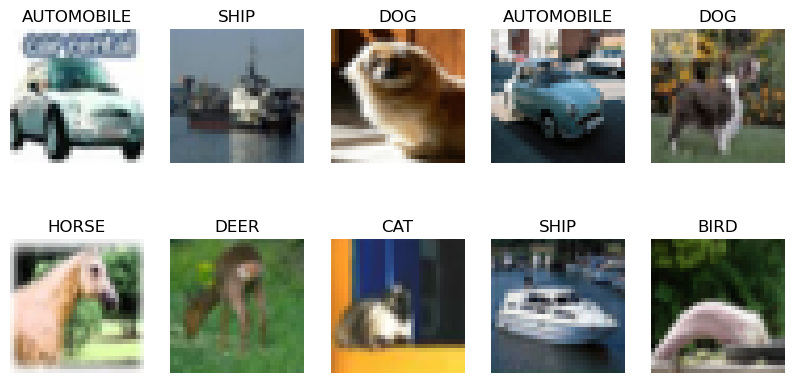

In [6]:
def show_images(imgs, labels, class_names, num= 10):
    plt.figure(figsize = (10, 5))
    for i in range(num):
        plt.subplot(2, 5, i+1)
        plt.imshow(imgs[i])
        plt.title(class_names[labels[i]].upper())
        plt.axis("off")
    plt.show()

#On charge nos métadonnées afin d'obtenir les noms des classes correspondantes
def load_meta_data(file):
    with open(file, "rb") as f:
        meta_data_dict = pickle.load(f, encoding = "bytes")
        return [label.decode("utf-8") for label in meta_data_dict[b"label_names"]]

show_images(images, labels, class_names)
    

<h3>Visuel d'échantillon d'images</h3>
<p>On va regarder quelques échantillon d'images pour chaques class afin de constater si il ya des variations visuelles selon certaines classes ou anomalies</p>


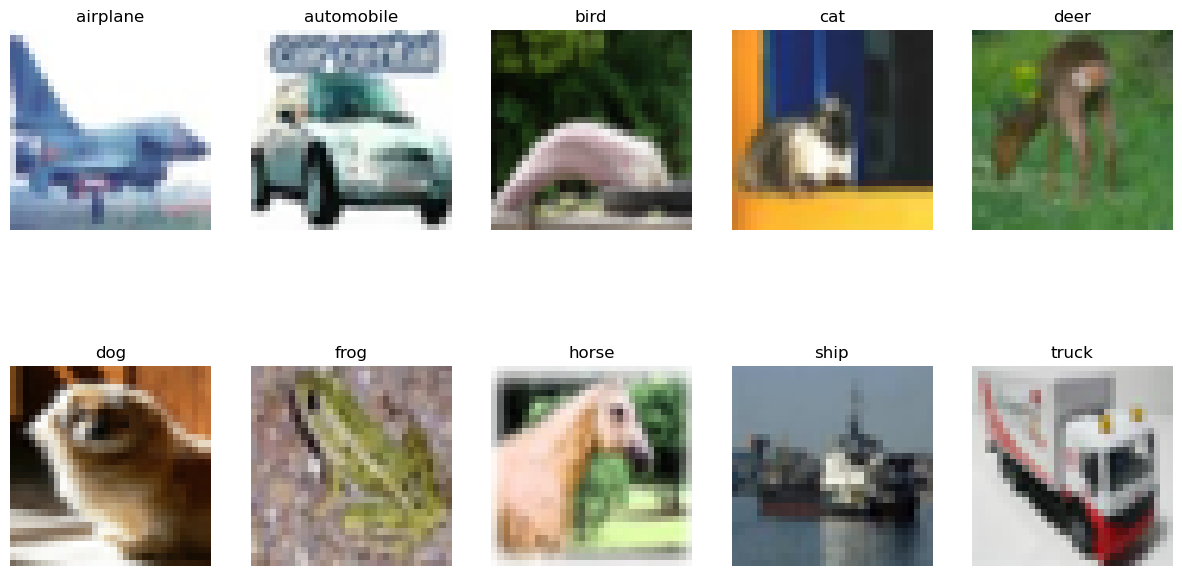

In [7]:
def show_sample_img_per_class(images, labels, class_names):
    plt.figure(figsize = (15, 8))
    for i in range(10):
        idx = labels.index(i)
        plt.subplot(2, 5, i+1)
        plt.imshow(images[idx])
        plt.title(class_names[i])
        plt.axis("off")
    plt.show()

show_sample_img_per_class(images.tolist(), labels, class_names)

<h3>Regroupement des données</h3>

In [8]:
def load_all_training_data(batch_files):
    all_images = []
    all_labels = []
    for batch_file in batch_files:
        images, labels = load_cifar10_batch_data(batch_file)
        all_images.append(images)
        all_labels.extend(labels)
    return np.concatenate(all_images), all_labels

# Liste des fichiers de lots avec le bon format
batch_files = [os.path.join(base_dir, f"data_batch_{i}") for i in range(1, 6)]

# Charger toutes les données d'entraînement
train_images, train_labels = load_all_training_data(batch_files)

print(f"Ensemble d'entraînement : {train_images.shape}, Labels : {len(train_labels)}")

# Fonction pour calculer la distribution des classes
def compute_class_distribution(labels):
    class_counts = Counter(labels)
    for class_idx, count in class_counts.items():
        print(f"Classe {class_idx}: {count} images")

compute_class_distribution(train_labels)

Ensemble d'entraînement : (50000, 32, 32, 3), Labels : 50000
Classe 6: 5000 images
Classe 9: 5000 images
Classe 4: 5000 images
Classe 1: 5000 images
Classe 2: 5000 images
Classe 7: 5000 images
Classe 8: 5000 images
Classe 3: 5000 images
Classe 5: 5000 images
Classe 0: 5000 images


<h2>Pré-traitement des images</h2>

<h3>Normalisation des images</h3>

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_images = train_images/255.0
x_test = x_test/255.0

train_labels = np.array(train_labels)
y_test = np.array(y_test)

<p>Vu que les valeurs des pixels sont comprises entre 0 et 255 ce qui pourrait affecter notre modèle. On va s'assurer que toutes les valeurs des pixels des images soit comprises entre 0 et 1.</p>

<h3>Augmentation des données</h3>

<p>On va enrichir nos données d'entrainement en faisant de l'augmentation de nos données</p>

In [11]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = 0.05,
    fill_mode = "nearest"
    
)

datagen.fit(train_images)

<h2>Création de notre modèle</h2>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import warnings


In [13]:
model = Sequential([
    Input(shape = (32, 32, 3)),
    
    Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation = "relu", padding= "same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation = "relu", padding ="same"),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.35),

    Conv2D(256, (3, 3), activation = "relu", padding = "same"),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation = "relu", padding = "same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(256, activation= "relu", kernel_regularizer = l2(0.001)),
    Dropout(0.5),
    Dense(128, activation = "relu", kernel_regularizer = l2(0.001)),
    Dropout(0.3),
    Dense(10, activation = "softmax")
])

model.compile(optimizer = Adam(learning_rate = 0.0003), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [14]:
#Integration d'un Callback afin d'optimiser l'entrainement de mon modèle
early_stopping = EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 4)

In [15]:
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size = 64),
    epochs = 30,
    validation_data = (x_test, y_test),
    callbacks = [early_stopping, reduce_lr]
)

warnings.filterwarnings("ignore", category = UserWarning)

Epoch 1/30


C:\Users\JOURNAUX\Desktop\projet_IA\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 241s 302ms/step - accuracy: 0.2029 - loss: 3.0208 - val_accuracy: 0.4334 - val_loss: 2.0976 - learning_rate: 3.0000e-04
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 221s 282ms/step - accuracy: 0.3707 - loss: 2.2386 - val_accuracy: 0.4436 - val_loss: 2.0689 - learning_rate: 3.0000e-04
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 212s 271ms/step - accuracy: 0.4702 - loss: 1.8728 - val_accuracy: 0.5430 - val_loss: 1.6306 - learning_rate: 3.0000e-04
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 214s 273ms/step - accuracy: 0.5391 - loss: 1.5928 - val_accuracy: 0.5594 - val_loss: 1.4922 - learning_rate: 3.0000e-04
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 251ms/step - accuracy: 0.6013 - loss: 1.3820 - val_accuracy: 0.6329 - val_loss: 1.2526 - learning_rate: 3.0000e-04
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 193s 246ms/step - accuracy: 0.6525 - loss: 1.2236 - val_accuracy: 0.7004 - val_loss: 1.0721 - learning_rate: 3.0000e-04
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 195s 249ms/

In [16]:
#Evalution de mon modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur le set de test : {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8731 - loss: 0.4774
Précision sur le set de test : 87.10%


<h2>Evaluation du modèle CNN</h2>

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


<h3>Les différentes Metrics</h3>

In [19]:
print("Rapport de classification : ")
print(classification_report(y_test, y_pred_classes, target_names = class_names))

Rapport de classification : 
              precision    recall  f1-score   support

    airplane       0.89      0.87      0.88      1000
  automobile       0.93      0.96      0.95      1000
        bird       0.86      0.81      0.84      1000
         cat       0.79      0.72      0.75      1000
        deer       0.82      0.88      0.85      1000
         dog       0.92      0.69      0.79      1000
        frog       0.77      0.97      0.86      1000
       horse       0.91      0.92      0.91      1000
        ship       0.94      0.94      0.94      1000
       truck       0.91      0.94      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



<h4>Analyse du rapport de classification</h4>

<p>Pour ce qui est la performance globale. L'Accuracy du modèle est élevé à 87% sur le set de test. Et si on se réfère au rapport de classification, on peut constater qu'il y a une très bonne performance sur les classes telles que l'automobile, ship, truck qui ont un f1-score au-dessus de 90%.<br>Néanmoins, on peut constater des performances moindre pour des classes telles que Cat et Dog. En effet, le F1-score est de 75, notamment pour la classe cat qui, si on se réfère au rappel, est de 72 %, ce qui pourrait indiquer des données plus restreintes sur cette classe-là. Pour le reste, le score f1-score est compris entre 85 et 95%. Ce qui est une mesure appropriée. En ce qui concerne la classification, le rapport met en avant une bonne performance générale du modèle, avec une classification satisfaisante pour la plupart des classes.</p>

<p>Les différentes possibilités d'amélioration. En ce qui concerne les classes ayant un rappel faible (Dog, Bird), il serait possible d'intégrer les données ou éventuellement d'améliorer la régularisation du modèle. Également, en ce qui concerne le déséquilibre des performances. Certaines classes, comme Fog, ont un appel très élevé par rapport à la précision, ce qui suggère que le modèle favorise certaines prédictions.</p>


In [20]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


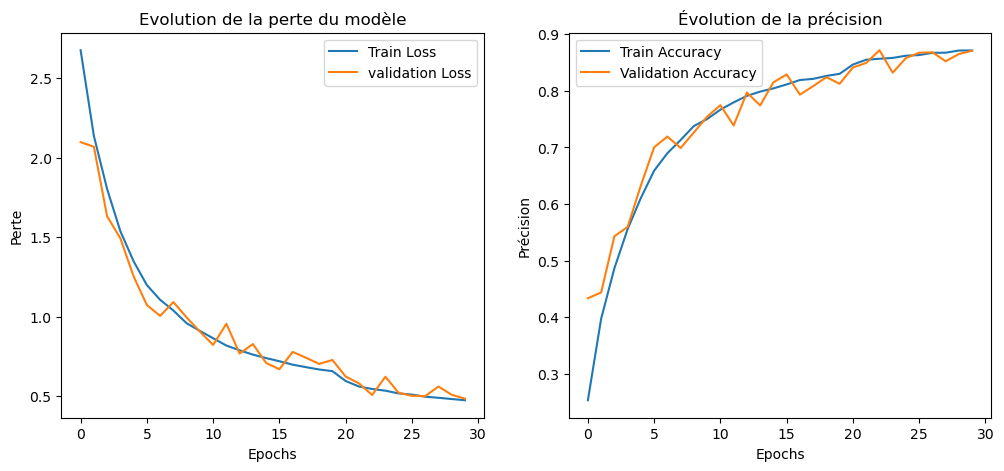

In [21]:
plt.figure(figsize = (12, 5))

#La courbe de PERTE
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Perte")

plt.legend()
plt.title("Evolution de la perte du modèle")

#Courbe de PRECISION
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Précision")

plt.legend()
plt.title("Évolution de la précision")


plt.show()


<h4>Analyse des courbes</h4>
<p>Le graphique de gauche montre que la perte d'entraînement diminue, ce qui indique que le modèle apprend correctement sur le set d'entraînement. En ce qui concerne la perte de la validation, elle suit la même trajectoire que le set d'entraînement. Néanmoins, on peut observer quelques variations, mais ce n'est pas alarmant. Il est possible de conclure qu'il n'y a pas d'overfitting dans cette situation. Les données de validation sont correctement généralisées par le modèle. <br>
    
Pour ce qui des courbes à droite,  sur la courbe de précision du set d'entrainement augmente de manière progressive pour atteindre une valeur élevée. Concernant la courbe de précision en validation, on peut constater une tendance similaire à la courbe du set d’entrainement, montrant une bonne généralisation du modèle CNN.</p>

<p>Pour ce qui est des améliorations possibles. On pourrait augmenter ou ajouter plus de données en les diversifiant davantage via la technique de la data augmentation ou l'ajout de données synthétiques. Surtout pour les classes posant problème.</p>


<h4>Matrice de corrélation</h4>

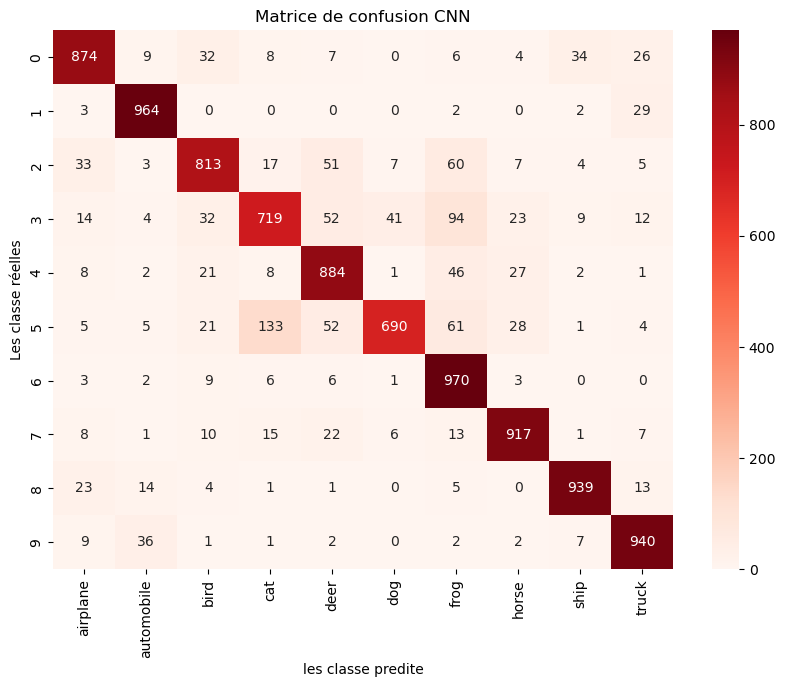

In [22]:
cm = confusion_matrix(y_test, y_pred_classes)

#On affiche la matrice
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", xticklabels = class_names)
plt.xlabel("les classe predite")
plt.ylabel("Les classe réelles")
plt.title("Matrice de confusion CNN")
plt.show()

<h4>Analyse de la matrice de corrélation</h4>
<p>On peut observer que la matrice montre une bonne performance sur les classes "automobile", "truck", "frog", "ship" et "horse". On peut cependant distinguer une confusion fréquente entre les classes "Cat" et "Dog". Pour ce qui est de la classe "Bird", on peut voir qu'elle se confond parfois avec "Frog" ou "Deer", peut-être en raison des textures ou des arrière-plans similaires. Enfin, on peut aussi apercevoir que la classe "Airplane" est parfois confondue avec les classes "Ship" ou "Truck".  </p>

<p>Les améliorations que l'on pourrait apporter, ce sont différentes techniques telles que la data augmentation ou l'ajout de données synthétiques concernant les classes "cat" et "dog", par exemple en important plus de variété. Une utilisation de techniques d'ensemble pour renforcer les prédictions.</p>

In [25]:
model.save("cnn_model_cifar10.keras")